In [2]:
import pandas as pd
datos = pd.read_csv("uac_limpio.csv")

In [59]:
datos.head(15)

,ESCUELA,EDAD,SEXO,EST_CIVIL,HIJOS,TRABAJA_ESTUDIA,VIVE_SOLO,NIVEL_SOCIO_ECON,SEMESTRE,PPACumulado,EXCELENCIA
0,ADMINISTRACIÓN,20,1,0,0,0,0,2,4,14.128,0
1,ADMINISTRACIÓN,27,0,0,0,1,0,2,5,12.796,0
2,ADMINISTRACIÓN,22,0,0,0,1,1,1,10,14.906,0
3,ADMINISTRACIÓN,27,1,2,1,1,1,2,7,15.309,0
4,ADMINISTRACIÓN,31,0,0,0,1,1,2,10,14.581,0
5,ADMINISTRACIÓN,20,1,0,0,0,1,2,6,17.349,1
6,ADMINISTRACIÓN,23,1,0,0,0,0,2,10,14.743,0
7,ADMINISTRACIÓN,20,0,0,0,1,1,1,6,15.751,0
8,ADMINISTRACIÓN,23,0,0,0,1,0,0,8,14.585,0
9,ADMINISTRACIÓN,18,0,0,0,1,0,0,1,15.000,0


In [4]:
datos.describe()

,EDAD,SEXO,EST_CIVIL,HIJOS,TRABAJA_ESTUDIA,VIVE_SOLO,NIVEL_SOCIO_ECON,SEMESTRE,PPACumulado,EXCELENCIA
count,7523.000000,7523.000000,7523.000000,7523.000000,7523.000000,7523.000000,7523.000000,7523.000000,7523.000000,7523.000000
mean,23.261066,0.525189,0.120697,0.100758,0.648677,0.338828,1.000798,6.727369,15.047301,0.293633
std,4.799147,0.499398,0.453121,0.301028,0.477415,0.473343,0.813506,3.208227,1.963216,0.455456
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,14.385500,0.000000
50%,22.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,7.000000,15.322000,0.000000
75%,25.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,9.000000,16.166500,1.000000
max,59.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,14.000000,18.929000,1.000000


In [5]:
cat_columns = ["ESCUELA", "EST_CIVIL", "NIVEL_SOCIO_ECON"]
datos_encoded = pd.get_dummies(datos, columns=cat_columns, drop_first=True)

In [6]:
datos_encoded.head()

,EDAD,SEXO,HIJOS,TRABAJA_ESTUDIA,VIVE_SOLO,SEMESTRE,PPACumulado,EXCELENCIA,ESCUELA_ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,ESCUELA_ARQUITECTURA,...,ESCUELA_INGENIERÍA AMBIENTAL,ESCUELA_INGENIERÍA CIVIL,ESCUELA_INGENIERÍA DE SISTEMAS,ESCUELA_INGENIERÍA INDUSTRIAL,ESCUELA_MEDICINA HUMANA,ESCUELA_TURISMO,EST_CIVIL_1,EST_CIVIL_2,NIVEL_SOCIO_ECON_1,NIVEL_SOCIO_ECON_2
0,20,1,0,0,0,4,14.128,0,False,False,...,False,False,False,False,False,False,False,False,False,True
1,27,0,0,1,0,5,12.796,0,False,False,...,False,False,False,False,False,False,False,False,False,True
2,22,0,0,1,1,10,14.906,0,False,False,...,False,False,False,False,False,False,False,False,True,False
3,27,1,1,1,1,7,15.309,0,False,False,...,False,False,False,False,False,False,False,True,False,True
4,31,0,0,1,1,10,14.581,0,False,False,...,False,False,False,False,False,False,False,False,False,True


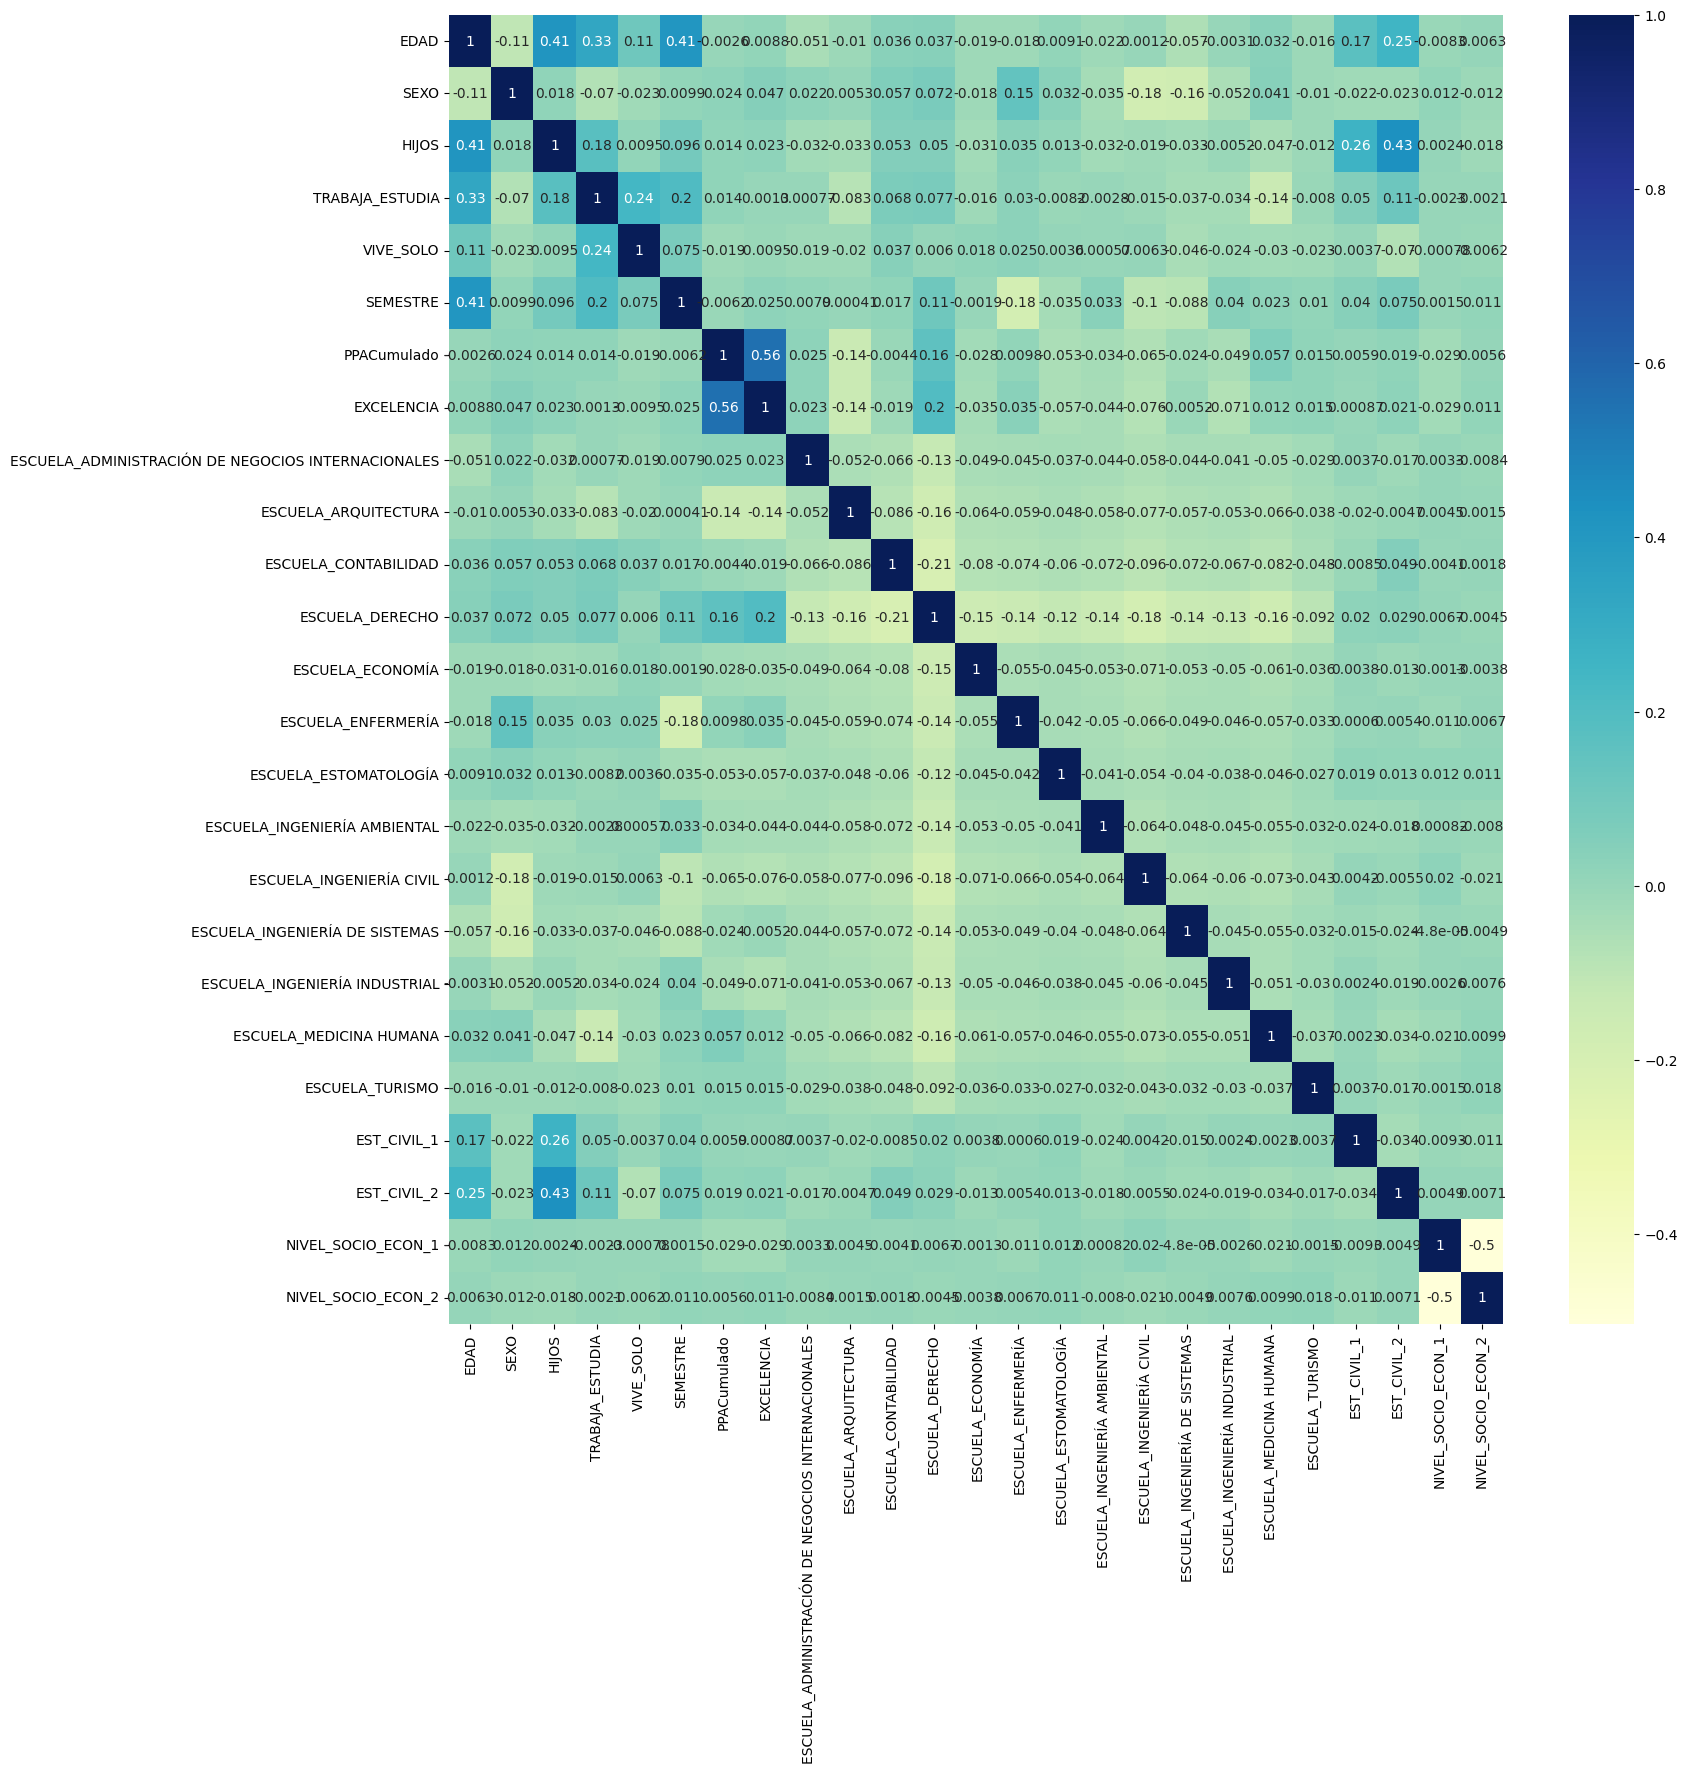

In [7]:
#MAPA DE CALOR PARA DATASET ENCODED
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(17, 17))  # Ajusta el tamaño según sea necesario
sb.heatmap(datos_encoded.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [9]:
#VEMOS FUERTE CORRELACION ENTRE PPACumulado Y EXCELENCIA
X = datos_encoded.drop("EXCELENCIA", axis=1)
y = datos_encoded["EXCELENCIA"]
from sklearn.model_selection import train_test_split
X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

1.0

El modelo presenta precision de 100%, no hay buen enfoque en el tratamiento de datos

In [10]:
#DADO LA ALTA CORRELACION ENTRE VARIABLES-COLUMNAS PROBAMOS RETIRANDO PPACumulado
dtnoppa = datos_encoded.drop(["PPACumulado"], axis=1)

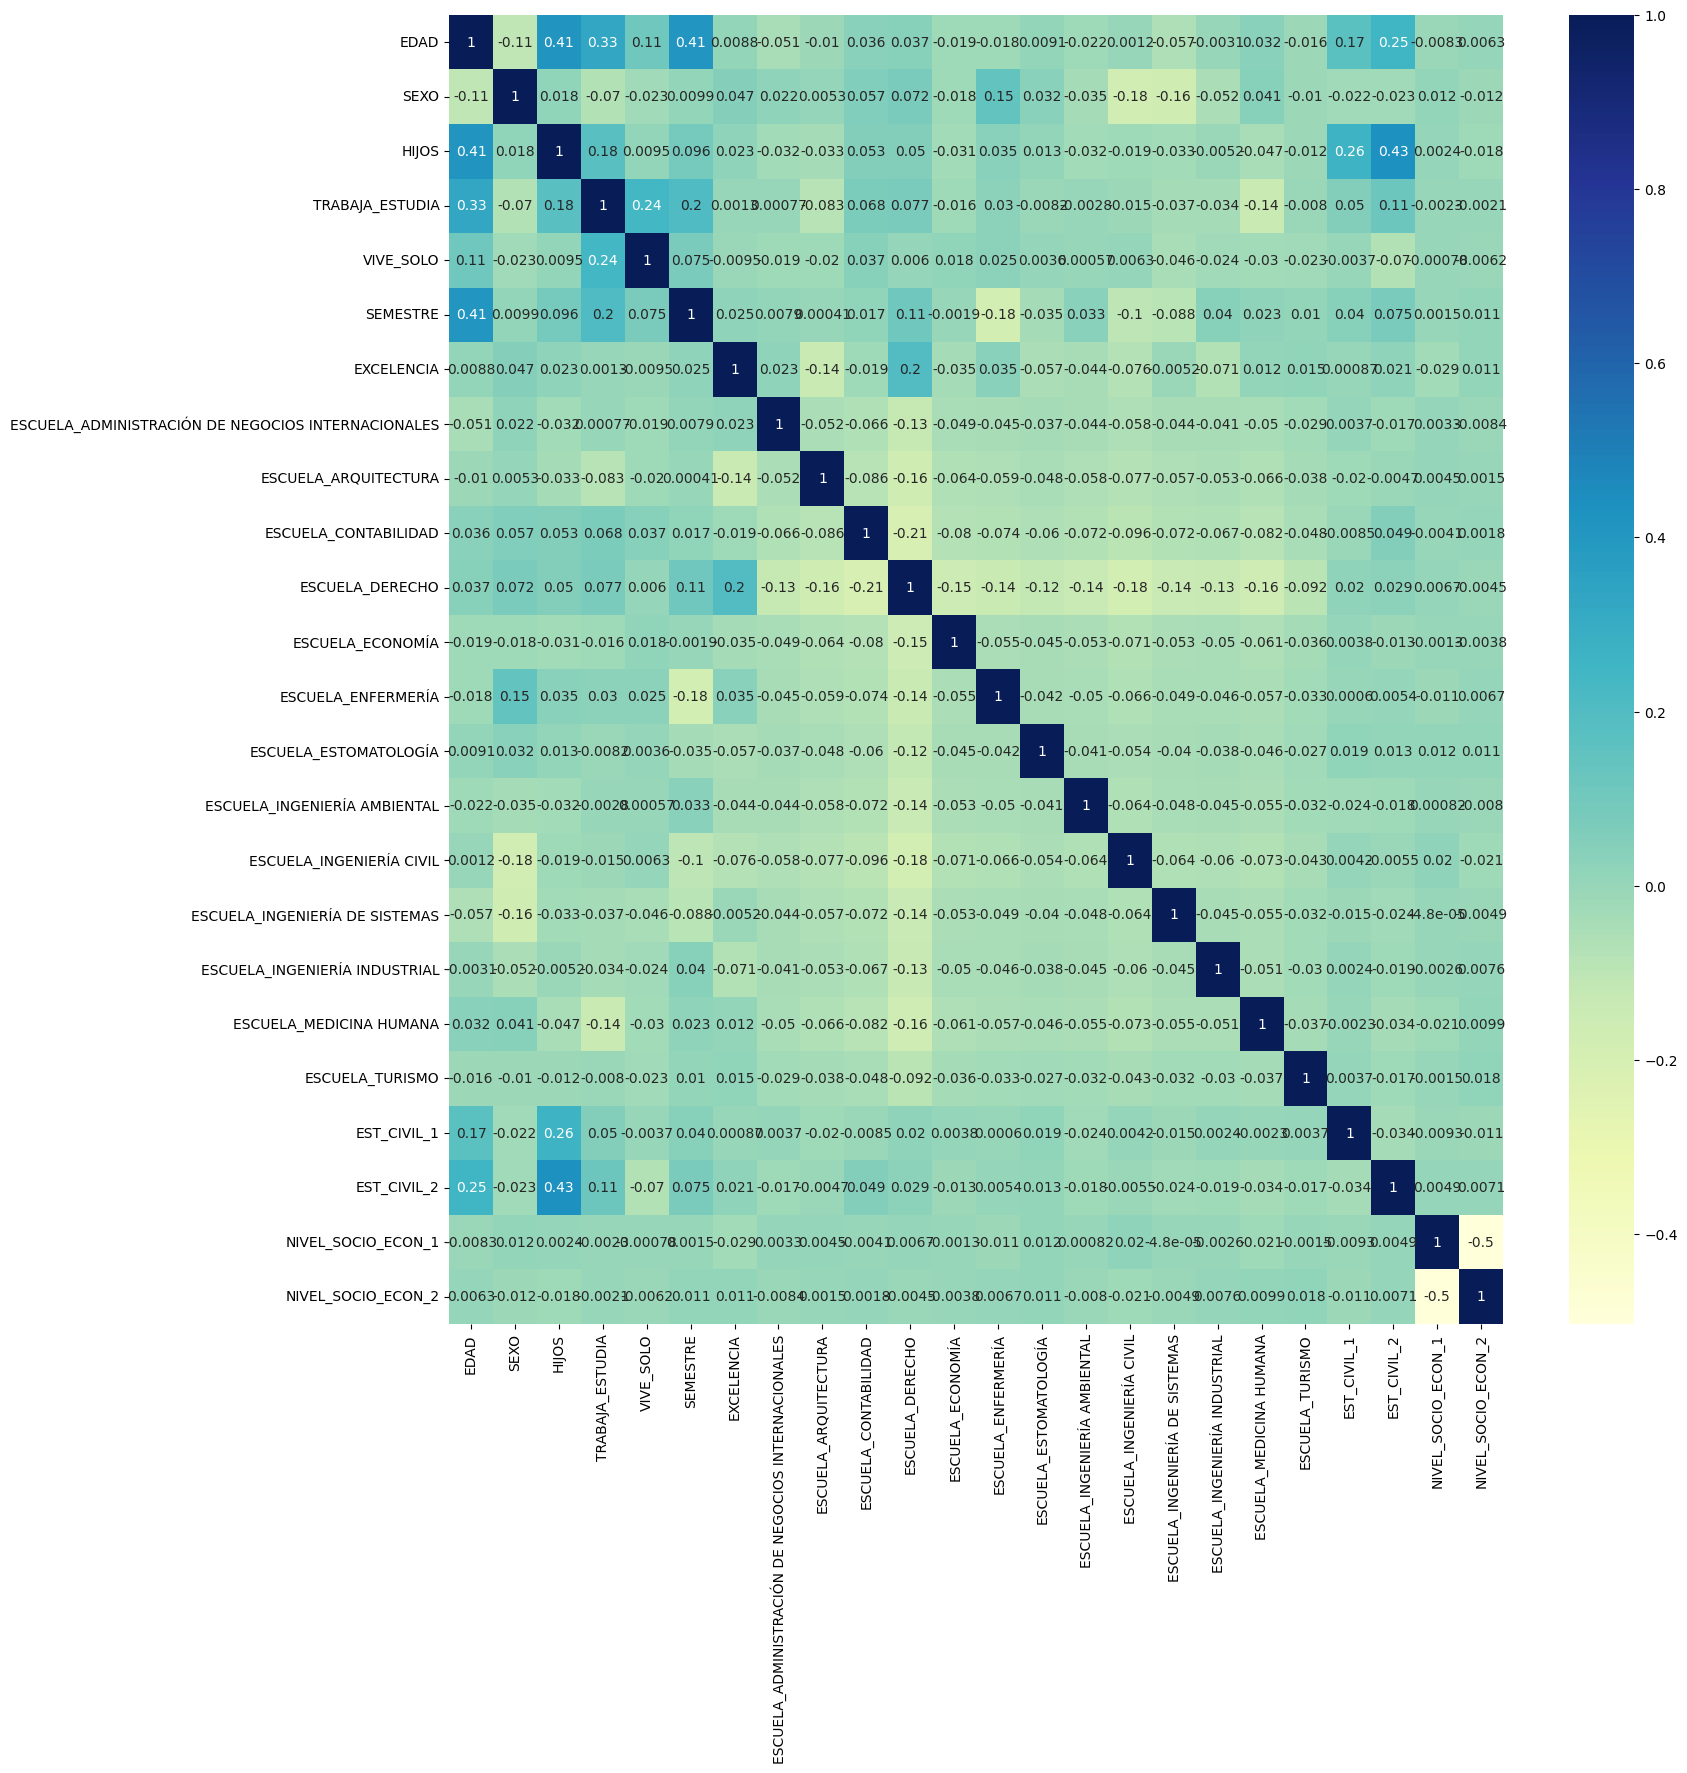

In [11]:
plt.figure(figsize=(17, 17))  # Ajusta el tamaño según sea necesario
sb.heatmap(dtnoppa.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [26]:
#PROBAMOS MODELO QUE NO POSEE COLUMNA DE PPACumulado
X = dtnoppa.drop("EXCELENCIA", axis=1)
b = dtnoppa["EXCELENCIA"]
X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)
accuracy_score(y_pru, predicciones)

0.5920265780730897

In [25]:
#AHORA MEDIANTE VALIDACION CRUZADA EVALUAMOS SI EL RENDIMIENTO DEL MODELO NO ESTA SOBREAJUSTADO A LOS DATOS
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelo, X, y, cv=10)  # 5-fold cross-validation
print(f"Precisión media de validación cruzada: {scores.mean()}, Desviación estándar: {scores.std()}")


Precisión media de validación cruzada: 0.48460961120058765, Desviación estándar: 0.1859976708856335


44% de media sugiere que el modelo no esta funcionando de manera optima.
22% de desviacion estandar indica que el modelo varia significaivamente en diferentes divisiones de los datos

In [21]:
#VIF VARIANCE INFLATION FACTOR verificamos que no hay multicolinealidad fuerte
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

V = dtnoppa.drop("EXCELENCIA", axis=1)
V = V.astype(int)
vif = pd.DataFrame()
vif["Variable"] = V.columns
vif["VIF"] = [variance_inflation_factor(V.values, i) for i in range(V.shape[1])]

# Mostrar el DataFrame con los resultados del VIF
vif
#vif>5 posibilidad de elminar

,Variable,VIF
0,EDAD,19.279439
1,SEXO,2.195622
2,HIJOS,1.629179
3,TRABAJA_ESTUDIA,3.544264
4,VIVE_SOLO,1.635734
5,SEMESTRE,7.102430
6,ESCUELA_ADMINISTRACIÓN DE NEGOCIOS INTERNACION...,1.304536
7,ESCUELA_ARQUITECTURA,1.559053
8,ESCUELA_CONTABILIDAD,1.851292
9,ESCUELA_DERECHO,3.436955


FEATURE IMPORTANCE PARA EVALUAR QUE TANTO CONTRIBUYEN LAS VARIABLES AL MODELO

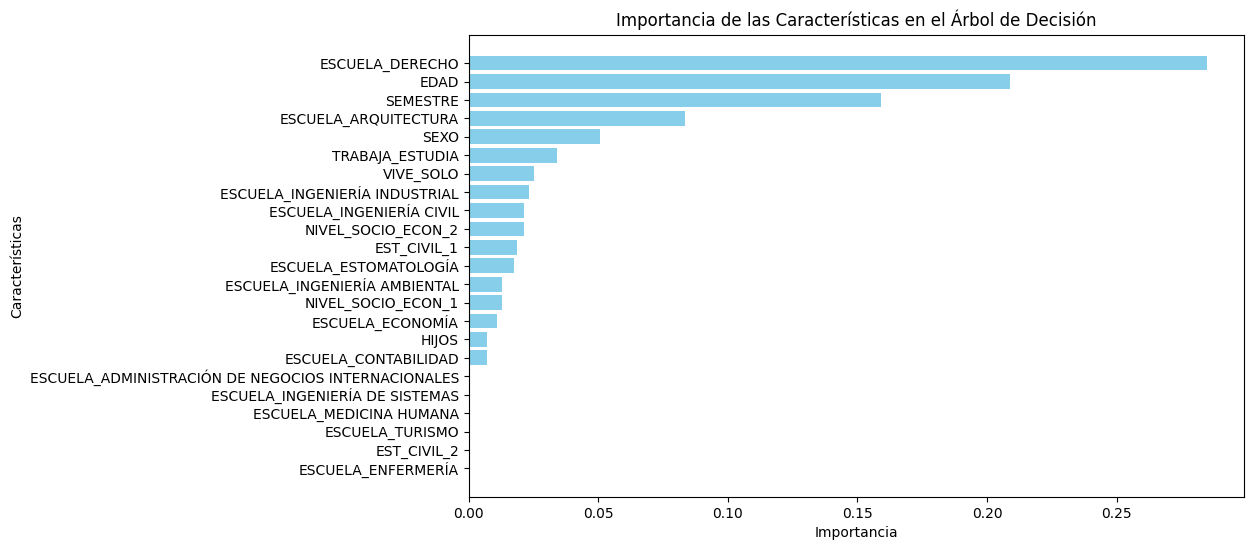

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

importancia_caracteristicas = modelo.feature_importances_
# Crear un DataFrame para las importancias
importancia_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importancia_caracteristicas
})

# Ordenar las variables por importancia
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

# Graficar la importancia de las variables
plt.figure(figsize=(10, 6))
plt.barh(importancia_df['Variable'], importancia_df['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características en el Árbol de Decisión')
plt.gca().invert_yaxis()
plt.show()

GRACIAS A FEATURE IMPORTANCE SABEMOS QUE AUNQUE EL VIF NOS INDIQUE OTRO COSA NO DEBEMOS ELIMINARLO

In [24]:
for nombre, importancia in zip(X.columns, importancia_caracteristicas):
    print(f"{nombre}: {importancia:.4f}")

EDAD: 0.2090
SEXO: 0.0507
HIJOS: 0.0072
TRABAJA_ESTUDIA: 0.0343
VIVE_SOLO: 0.0253
SEMESTRE: 0.1593
ESCUELA_ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES: 0.0000
ESCUELA_ARQUITECTURA: 0.0833
ESCUELA_CONTABILIDAD: 0.0071
ESCUELA_DERECHO: 0.2848
ESCUELA_ECONOMÍA: 0.0110
ESCUELA_ENFERMERÍA: 0.0000
ESCUELA_ESTOMATOLOGÍA: 0.0176
ESCUELA_INGENIERÍA AMBIENTAL: 0.0130
ESCUELA_INGENIERÍA CIVIL: 0.0214
ESCUELA_INGENIERÍA DE SISTEMAS: 0.0000
ESCUELA_INGENIERÍA INDUSTRIAL: 0.0232
ESCUELA_MEDICINA HUMANA: 0.0000
ESCUELA_TURISMO: 0.0000
EST_CIVIL_1: 0.0186
EST_CIVIL_2: 0.0000
NIVEL_SOCIO_ECON_1: 0.0129
NIVEL_SOCIO_ECON_2: 0.0213


In [33]:
#DADA LA CONTRAINDICACION DE VIF Y FEATURE IMPORTANCE MI CRITERIO QUEDA EN PERMANECER LA VARIABLE EDAD
#PROBAREMOS MEJORES PARAMETROS PARA EL MODELO
resultados = []
for i in range(1,15):
  modelo = DecisionTreeClassifier(max_depth=i)
  modelo.fit(X_ent, y_ent)
  predicciones = modelo.predict(X_pru)
  exactitud = accuracy_score(y_pru, predicciones)
  print(f"Resultado para {i}: {exactitud}")
  resultados.append(exactitud)


Resultado para 1: 0.7162790697674418
Resultado para 2: 0.7162790697674418
Resultado para 3: 0.7162790697674418
Resultado para 4: 0.7162790697674418
Resultado para 5: 0.7156146179401993
Resultado para 6: 0.7149501661129568
Resultado para 7: 0.695016611295681
Resultado para 8: 0.7036544850498339
Resultado para 9: 0.6943521594684385
Resultado para 10: 0.6897009966777409
Resultado para 11: 0.6837209302325581
Resultado para 12: 0.6651162790697674
Resultado para 13: 0.6637873754152824
Resultado para 14: 0.654485049833887


<Axes: >

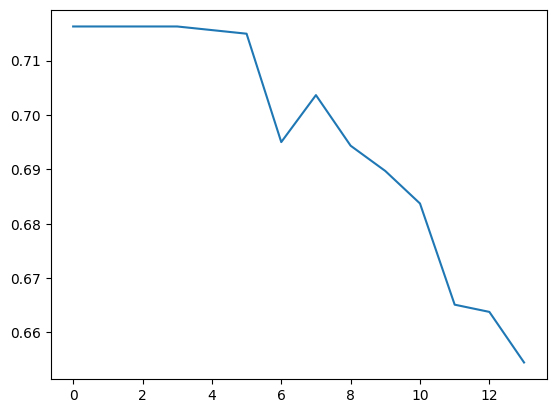

In [35]:
sb.lineplot(data=resultados)

In [34]:
#profundidad de arbol
X = dtnoppa.drop("EXCELENCIA", axis=1)
b = dtnoppa["EXCELENCIA"]
X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = DecisionTreeClassifier(max_depth=8)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)
accuracy_score(y_pru, predicciones)

0.7036544850498339

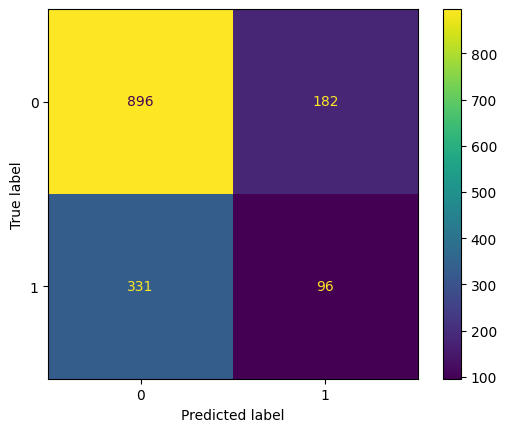

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Crear matriz de confusión
cm = confusion_matrix(y_pru, predicciones)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.72      0.97      0.82      1078
           1       0.31      0.04      0.06       427

    accuracy                           0.70      1505
   macro avg       0.51      0.50      0.44      1505
weighted avg       0.60      0.70      0.61      1505



In [37]:
X_ent.columns

Index(['EDAD', 'SEXO', 'HIJOS', 'TRABAJA_ESTUDIA', 'VIVE_SOLO', 'SEMESTRE',
       'ESCUELA_ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES',
       'ESCUELA_ARQUITECTURA', 'ESCUELA_CONTABILIDAD', 'ESCUELA_DERECHO',
       'ESCUELA_ECONOMÍA', 'ESCUELA_ENFERMERÍA', 'ESCUELA_ESTOMATOLOGÍA',
       'ESCUELA_INGENIERÍA AMBIENTAL', 'ESCUELA_INGENIERÍA CIVIL',
       'ESCUELA_INGENIERÍA DE SISTEMAS', 'ESCUELA_INGENIERÍA INDUSTRIAL',
       'ESCUELA_MEDICINA HUMANA', 'ESCUELA_TURISMO', 'EST_CIVIL_1',
       'EST_CIVIL_2', 'NIVEL_SOCIO_ECON_1', 'NIVEL_SOCIO_ECON_2'],
      dtype='object')

[Text(0.6458675986842105, 0.9444444444444444, 'ESCUELA_DERECHO <= 0.5\n0.417\n6018\n[4236, 1782]\nEXCELENTE'),
 Text(0.3951480263157895, 0.8333333333333334, 'ESCUELA_ARQUITECTURA <= 0.5\n0.363\n4326\n[3296, 1030]\nEXCELENTE'),
 Text(0.5205078125, 0.8888888888888888, 'True  '),
 Text(0.23314144736842105, 0.7222222222222222, 'ESCUELA_INGENIERÍA CIVIL <= 0.5\n0.381\n3946\n[2934, 1012]\nEXCELENTE'),
 Text(0.12664473684210525, 0.6111111111111112, 'ESCUELA_INGENIERÍA INDUSTRIAL <= 0.5\n0.392\n3478\n[2546.0, 932.0]\nEXCELENTE'),
 Text(0.07730263157894737, 0.5, 'ESCUELA_ESTOMATOLOGÍA <= 0.5\n0.401\n3236\n[2338, 898]\nEXCELENTE'),
 Text(0.04276315789473684, 0.3888888888888889, 'ESCUELA_ECONOMÍA <= 0.5\n0.408\n3036\n[2169, 867]\nEXCELENTE'),
 Text(0.02631578947368421, 0.2777777777777778, 'ESCUELA_INGENIERÍA AMBIENTAL <= 0.5\n0.416\n2694\n[1900, 794]\nEXCELENTE'),
 Text(0.013157894736842105, 0.16666666666666666, 'TRABAJA_ESTUDIA <= 0.5\n0.424\n2407\n[1673, 734]\nEXCELENTE'),
 Text(0.0065789473684

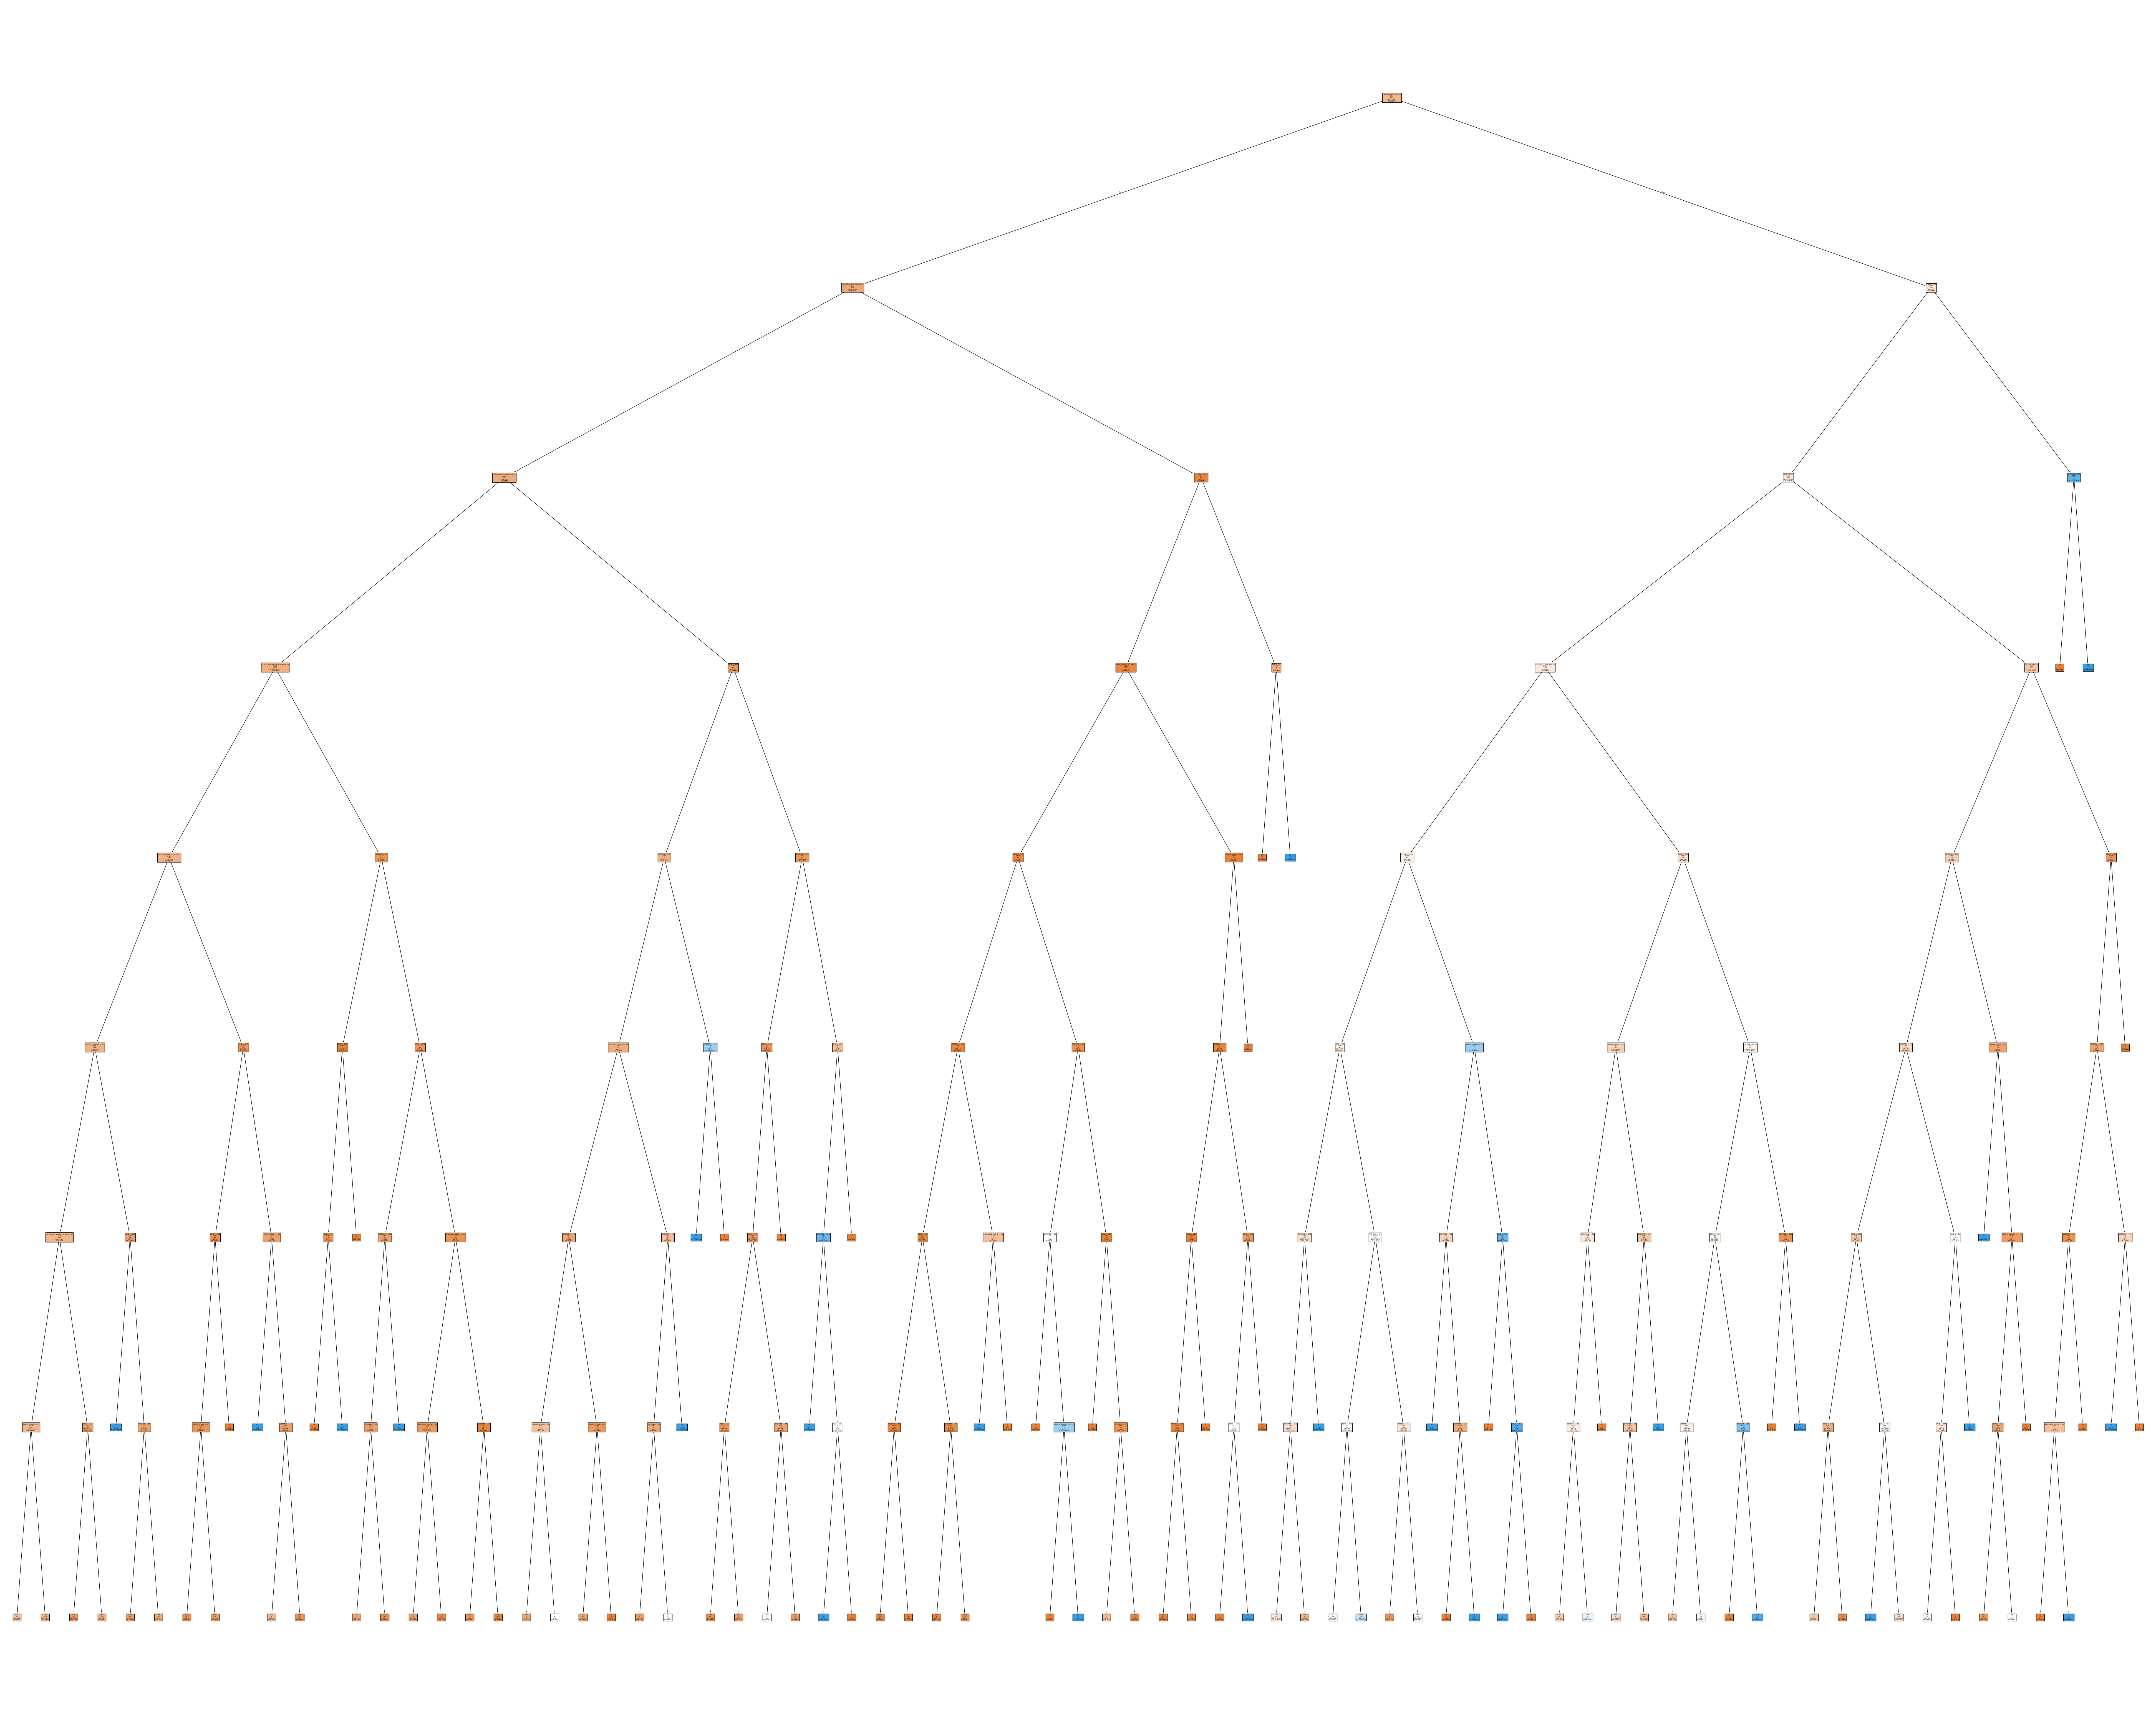

In [38]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 80))
plot_tree(
    modelo,
    feature_names=X_ent.columns,
    class_names=["EXCELENTE", "NO EXCELENTE"],
    filled=True, label="none"
)

In [53]:
datos[['PPACumulado', 'EXCELENCIA', 'EDAD']].head(10)

,PPACumulado,EXCELENCIA,EDAD
0,14.128,0,20
1,12.796,0,27
2,14.906,0,22
3,15.309,0,27
4,14.581,0,31
5,17.349,1,20
6,14.743,0,23
7,15.751,0,20
8,14.585,0,23
9,15.000,0,18


In [72]:
datos.head(17)

,ESCUELA,EDAD,SEXO,EST_CIVIL,HIJOS,TRABAJA_ESTUDIA,VIVE_SOLO,NIVEL_SOCIO_ECON,SEMESTRE,PPACumulado,EXCELENCIA
0,ADMINISTRACIÓN,20,1,0,0,0,0,2,4,14.128,0
1,ADMINISTRACIÓN,27,0,0,0,1,0,2,5,12.796,0
2,ADMINISTRACIÓN,22,0,0,0,1,1,1,10,14.906,0
3,ADMINISTRACIÓN,27,1,2,1,1,1,2,7,15.309,0
4,ADMINISTRACIÓN,31,0,0,0,1,1,2,10,14.581,0
5,ADMINISTRACIÓN,20,1,0,0,0,1,2,6,17.349,1
6,ADMINISTRACIÓN,23,1,0,0,0,0,2,10,14.743,0
7,ADMINISTRACIÓN,20,0,0,0,1,1,1,6,15.751,0
8,ADMINISTRACIÓN,23,0,0,0,1,0,0,8,14.585,0
9,ADMINISTRACIÓN,18,0,0,0,1,0,0,1,15.000,0


In [87]:
x.iloc[15].values

array([27, 1, 0, 1, 1, 5, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False], dtype=object)

In [89]:
nueva_persona = [27, 1, 0, 1, 1, 5, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False]
prediccion = modelo.predict([nueva_persona])
if prediccion[0] == 1:
  print("EXCELENTE")
else:
  print("No EXCELENTE")

No EXCELENTE


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [88]:
dato_especifico = dtnoppa.iloc[15].drop("EXCELENCIA")  # Excluir la columna de la variable objetivo
dato_especifico = dato_especifico.astype(int)  # Asegúrate de que los tipos de datos son correctos

# 2. Obtener el valor real de la variable objetivo
valor_real = dtnoppa.iloc[15]["EXCELENCIA"]

# 3. Hacer la predicción
prediccion = modelo.predict([dato_especifico])

# 4. Comparar la predicción con el valor real
if prediccion[0] == 1:
    resultado_prediccion = "EXCELENTE"
else:
    resultado_prediccion = "NO EXCELENTE"

# Mostrar resultados
print(f"Predicción: {resultado_prediccion}")
print(f"Valor real: {'EXCELENTE' if valor_real == 1 else 'NO EXCELENTE'}")

if prediccion[0] == valor_real:
    print("La predicción es correcta.")
else:
    print("La predicción es incorrecta.")

Predicción: NO EXCELENTE
Valor real: EXCELENTE
La predicción es incorrecta.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
